# 3. 常用函數

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 3.2 文件讀寫

In [2]:
i2 =  np.eye(2)
i2

array([[ 1.,  0.],
       [ 0.,  1.]])

In [3]:
np.savetxt('i2.txt', i2)

## 3.4 讀入 CSV 檔案

In [4]:
c, v = np.loadtxt('data.csv', delimiter=',', usecols=(6,7), unpack=True)
c, v

(array([ 336.1 ,  339.32,  345.03,  344.32,  343.44,  346.5 ,  351.88,
         355.2 ,  358.16,  354.54,  356.85,  359.18,  359.9 ,  363.13,
         358.3 ,  350.56,  338.61,  342.62,  342.88,  348.16,  353.21,
         349.31,  352.12,  359.56,  360.  ,  355.36,  355.76,  352.47,
         346.67,  351.99]),
 array([ 21144800.,  13473000.,  15236800.,   9242600.,  14064100.,
         11494200.,  17322100.,  13608500.,  17240800.,  33162400.,
         13127500.,  11086200.,  10149000.,  17184100.,  18949000.,
         29144500.,  31162200.,  23994700.,  17853500.,  13572000.,
         14395400.,  16290300.,  21521000.,  17885200.,  16188000.,
         19504300.,  12718000.,  16192700.,  18138800.,  16824200.]))

## 3.6 成交量加權平均價格 (VWAP)

In [5]:
vwap = np.average(c, weights = v)
vwap

350.58954935320088

In [6]:
np.mean(c)

351.03766666666672

In [7]:
#  TWAP (Time Weighted Average Price)
t = np.arange(len(c))
twap = np.average(c, weights = t)
twap

352.42832183908041

## 3.8 最大最小

In [8]:
h, l = np.loadtxt('data.csv', delimiter=',', usecols=(4, 5), unpack=True)

In [9]:
np.max(h)

364.89999999999998

In [10]:
np.min(l)

333.52999999999997

In [11]:
np.ptp(h)

24.859999999999957

In [12]:
np.ptp(l)

26.970000000000027

## 3.10 統計分析

In [13]:
c  = np.loadtxt('data.csv', delimiter=',', usecols=(6, ), unpack=True)

In [14]:
np.median(c)

352.05500000000001

In [15]:
sorted_close = np.msort(c)
sorted_close

array([ 336.1 ,  338.61,  339.32,  342.62,  342.88,  343.44,  344.32,
        345.03,  346.5 ,  346.67,  348.16,  349.31,  350.56,  351.88,
        351.99,  352.12,  352.47,  353.21,  354.54,  355.2 ,  355.36,
        355.76,  356.85,  358.16,  358.3 ,  359.18,  359.56,  359.9 ,
        360.  ,  363.13])

In [16]:
sorted_close.var()

50.126517888888884

In [17]:
np.var(sorted_close)

50.126517888888884

## 3.12 股票收益率

In [18]:
returns = np.diff(c) / c[:-1]
returns

array([ 0.00958048,  0.01682777, -0.00205779, -0.00255576,  0.00890985,
        0.0155267 ,  0.00943503,  0.00833333, -0.01010721,  0.00651548,
        0.00652935,  0.00200457,  0.00897472, -0.01330102, -0.02160201,
       -0.03408832,  0.01184253,  0.00075886,  0.01539897,  0.01450483,
       -0.01104159,  0.00804443,  0.02112916,  0.00122372, -0.01288889,
        0.00112562, -0.00924781, -0.0164553 ,  0.01534601])

In [19]:
sd = np.std(returns)
sd

0.012922134436826306

In [20]:
returns_log = np.diff(np.log(c))
returns_log

array([ 0.00953488,  0.01668775, -0.00205991, -0.00255903,  0.00887039,
        0.01540739,  0.0093908 ,  0.0082988 , -0.01015864,  0.00649435,
        0.00650813,  0.00200256,  0.00893468, -0.01339027, -0.02183875,
       -0.03468287,  0.01177296,  0.00075857,  0.01528161,  0.01440064,
       -0.011103  ,  0.00801225,  0.02090904,  0.00122297, -0.01297267,
        0.00112499, -0.00929083, -0.01659219,  0.01522945])

In [21]:
positive_return_indices = np.where(returns > 0)
positive_return_indices

(array([ 0,  1,  4,  5,  6,  7,  9, 10, 11, 12, 16, 17, 18, 19, 21, 22, 23,
        25, 28]),)

In [22]:
# 波動率 volatility
annual_volatility = np.std(returns_log) / np.mean(returns_log)
annual_volatility = annual_volatility / np.sqrt(1./252.)
annual_volatility

129.27478991115132

## 3.14 分析日期數據

In [23]:
def datestr2num(s):
    return datetime.datetime.strptime(s.decode(), '%d-%m-%Y').date().weekday()

dates, close = np.loadtxt('data.csv', delimiter=',', usecols=(1, 6), converters = {1: datestr2num}, unpack=True)
dates

array([ 4.,  0.,  1.,  2.,  3.,  4.,  0.,  1.,  2.,  3.,  4.,  0.,  1.,
        2.,  3.,  4.,  1.,  2.,  3.,  4.,  0.,  1.,  2.,  3.,  4.,  0.,
        1.,  2.,  3.,  4.])

In [24]:
averages = np.zeros(5)

In [25]:
for i in range(5):
    indices = np.where(dates == i)
    prices = close[indices]
    avg = np.mean(prices)
    averages[i] = avg
    print('Day {0} , prices {1}, average {2:0.2f}'.format(i, prices, avg))

Day 0 , prices [ 339.32  351.88  359.18  353.21  355.36], average 351.79
Day 1 , prices [ 345.03  355.2   359.9   338.61  349.31  355.76], average 350.64
Day 2 , prices [ 344.32  358.16  363.13  342.62  352.12  352.47], average 352.14
Day 3 , prices [ 343.44  354.54  358.3   342.88  359.56  346.67], average 350.90
Day 4 , prices [ 336.1   346.5   356.85  350.56  348.16  360.    351.99], average 350.02


## 3.16 匯總數據

In [26]:
# Monday 0
# Tuesday 1
# Wednesday 2
# Thursday 3
# Friday 4
# Saturday 5
# Sunday 6
from datetime import datetime
def datestr2num(s):
   return datetime.strptime(s.decode(), "%d-%m-%Y").date().weekday()

dates, open, high, low, close=np.loadtxt('data.csv', delimiter=',', usecols=(1, 3, 4, 5, 6), converters={1: datestr2num}, unpack=True)
close = close[:16]
dates = dates[:16]

# get first Monday
first_monday = np.ravel(np.where(dates == 0))[0]
print("The first Monday index is", first_monday)

# get last Friday
last_friday = np.ravel(np.where(dates == 4))[-1]
print("The last Friday index is", last_friday)

weeks_indices = np.arange(first_monday, last_friday + 1)
print("Weeks indices initial", weeks_indices)

weeks_indices = np.split(weeks_indices, 3)
print("Weeks indices after split", weeks_indices)

def summarize(a, o, h, l, c):
    monday_open = o[a[0]]
    week_high = np.max( np.take(h, a) )
    week_low = np.min( np.take(l, a) )
    friday_close = c[a[-1]]

    return("APPL", monday_open, week_high, week_low, friday_close)

weeksummary = np.apply_along_axis(summarize, 1, weeks_indices, open, high, low, close)
print("Week summary", weeksummary)

np.savetxt("weeksummary.csv", weeksummary, delimiter=",", fmt="%s")

The first Monday index is 1
The last Friday index is 15
Weeks indices initial [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Weeks indices after split [array([1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10]), array([11, 12, 13, 14, 15])]
Week summary [['APPL' '335.8' '346.7' '334.3' '346.5']
 ['APPL' '347.8' '360.0' '347.6' '356.8']
 ['APPL' '356.7' '364.9' '349.5' '350.5']]


## 3.17 真實波動幅度均值 (ATR)

In [27]:
import sys

h, l, c = np.loadtxt('data.csv', delimiter=',', usecols=(4, 5, 6), unpack=True)

N = 5
h = h[-N:]
l = l[-N:]

print ("len(h)", len(h), "len(l)", len(l))
print ("Close", c)
previousclose = c[-N -1: -1]

print ("len(previousclose)", len(previousclose))
print ("Previous close", previousclose)
truerange = np.maximum(h - l, h - previousclose, previousclose - l) 

print ("True range", truerange)

atr = np.zeros(N)

atr[0] = np.mean(truerange)

for i in range(1, N):
   atr[i] = (N - 1) * atr[i - 1] + truerange[i]
   atr[i] /= N

print ("ATR", atr)

len(h) 5 len(l) 5
Close [ 336.1   339.32  345.03  344.32  343.44  346.5   351.88  355.2   358.16
  354.54  356.85  359.18  359.9   363.13  358.3   350.56  338.61  342.62
  342.88  348.16  353.21  349.31  352.12  359.56  360.    355.36  355.76
  352.47  346.67  351.99]
len(previousclose) 5
Previous close [ 360.    355.36  355.76  352.47  346.67]
True range [ 10.36   5.15   4.16   4.87   7.32]
ATR [ 6.372      6.1276     5.73408    5.561264   5.9130112]


## 3.20 簡單 移動平均線(SMA, Simple Moving Average)

In [28]:
N = 5
weights = np.ones(N) / N
weights

array([ 0.2,  0.2,  0.2,  0.2,  0.2])

In [29]:
c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)
sma = np.convolve(weights, c)[N-1: -N+1]
sma

array([ 341.642,  343.722,  346.234,  348.268,  351.036,  353.256,
        355.326,  356.786,  357.726,  358.72 ,  359.472,  358.214,
        354.1  ,  350.644,  346.594,  344.566,  345.096,  347.236,
        349.136,  352.472,  354.84 ,  355.27 ,  356.56 ,  356.63 ,
        354.052,  352.45 ])

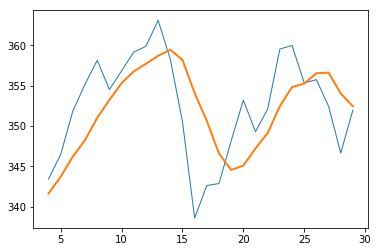

In [30]:
t = np.arange(N-1, len(c))
plot(t, c[N-1:], lw = 1.0)
plot(t, sma, lw= 2.0)
show()

## 3.22 指數移動平均線 (EMA, Exponential Moveing Average)

In [45]:
x = np.arange(5)
np.exp(x)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,  54.59815003])

In [46]:
np.linspace(-1, 0, 5)

array([-1.  , -0.75, -0.5 , -0.25,  0.  ])

In [47]:
N = 5
weights = np.exp(np.linspace(-1, 0, N))
weights

array([ 0.36787944,  0.47236655,  0.60653066,  0.77880078,  1.        ])

In [48]:
weights /= weights.sum()
weights

array([ 0.11405072,  0.14644403,  0.18803785,  0.24144538,  0.31002201])

In [43]:
ema = np.convolve(c, weights)[N-1:-N+1]

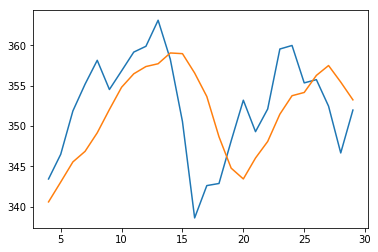

In [44]:
t = np.arange(N-1, len(c))
plot(t, c[N-1:])
plot(t, ema)
show()

## 3.24 布林帶 (Bollinger band)

## 3.26 用線性模型預測價格

In [49]:
b = c[-N:]
b

array([ 355.36,  355.76,  352.47,  346.67,  351.99])

In [50]:
b = b[::-1]
b

array([ 351.99,  346.67,  352.47,  355.76,  355.36])

In [53]:
A = np.zeros((N, N), dtype = float)
A

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [54]:
for i in range(N):
    A[i,] = c[-N -1-i: -1-i]
    
A

array([[ 360.  ,  355.36,  355.76,  352.47,  346.67],
       [ 359.56,  360.  ,  355.36,  355.76,  352.47],
       [ 352.12,  359.56,  360.  ,  355.36,  355.76],
       [ 349.31,  352.12,  359.56,  360.  ,  355.36],
       [ 353.21,  349.31,  352.12,  359.56,  360.  ]])

In [55]:
x, residuals, rank, s = np.linalg.lstsq(A, b)
x, residuals, rank, s 

(array([ 0.78111069, -1.44411737,  1.63563225, -0.89905126,  0.92009049]),
 array([], dtype=float64),
 5,
 array([  1.77736601e+03,   1.49622969e+01,   8.75528492e+00,
          5.15099261e+00,   1.75199608e+00]))

In [56]:
np.dot(b, x)

357.93916101523371

## 3.28 趨勢線

## 3.29 ndarray 的對象方法

## 3.30 數組的修剪和壓縮

In [57]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [58]:
a.clip(1, 2)

array([1, 1, 2, 2, 2])

In [59]:
a.compress(a>2)

array([3, 4])

In [60]:
a[a>2]

array([3, 4])

## 3.32 計算階乘

In [63]:
a = np.arange(1, 6)
a

array([1, 2, 3, 4, 5])

In [64]:
np.prod(a)

120

In [65]:
a.prod()

120

In [66]:
a.cumprod()

array([  1,   2,   6,  24, 120])